In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [34]:
df= pd.read_excel("Combined All Stations_100m+PM25 added preci.xlsx")

In [35]:
df

,lat,lon,time,ALBDO_L1_Avg_1,DLWRF_L1_Avg_1,DSWRF_L1_Avg_1,FRICV_L1,GUST_L1,HPBL_L1,LAND_L1,...,U_GRD_L103,ULWRF_L1_Avg_1,USWRF_L1_Avg_1,V_GRD_L103,VEG_L1,VIS_L1,Station Name,PM 2.5,AOD,PRATE_L1_Avg_1
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,NaN,3.826027,301.986018,1,...,0.177358,421.298931,24.68100,-3.067933,NaN,24135.001953,Belur Math,77.654583,0.581550,0.000000e+00
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,NaN,3.101588,267.144669,1,...,0.641507,422.392632,24.65800,-2.350824,NaN,24135.046875,Belur Math,58.124737,0.425139,0.000000e+00
2,22.630,88.352,2021-01-03,5.93766,322.803813,195.740000,NaN,2.774223,262.226417,1,...,-0.116059,425.339199,23.57400,-2.127140,NaN,24135.080078,Belur Math,NaN,0.665841,0.000000e+00
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,NaN,2.184178,245.017254,1,...,-0.406643,432.330161,24.27400,-1.479325,NaN,24134.914062,Belur Math,76.667778,0.415729,0.000000e+00
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,NaN,2.317436,244.012100,1,...,-0.299777,439.300757,24.09300,-0.909857,NaN,24134.949219,Belur Math,92.684583,0.384968,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,22.545,88.340,2023-08-27,11.06430,447.360698,218.351436,0.236240,4.011113,509.447365,1,...,1.729183,480.649783,21.86660,1.165340,27.3940,24134.960938,Victoria,40.327917,NaN,3.322000e-06
9726,22.545,88.340,2023-08-28,11.38305,446.798837,254.572562,0.232510,3.222736,348.428543,1,...,1.055720,491.225494,25.90458,0.574886,28.0470,24134.876953,Victoria,60.819167,NaN,0.000000e+00
9727,22.545,88.340,2023-08-29,11.53260,449.412098,170.017404,0.217375,2.810299,586.165287,1,...,0.205340,486.897797,17.79536,0.228833,28.7160,24135.013672,Victoria,70.484583,NaN,1.620000e-07
9728,22.545,88.340,2023-08-30,11.89660,444.362351,238.533522,0.196937,2.842451,508.752148,1,...,0.731016,494.799905,25.23142,0.528769,29.3645,24134.886719,Victoria,68.857619,NaN,4.600000e-08


In [36]:
# Assuming your DataFrame is named 'df'
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df['PM 2.5'].isnull().sum()


225

In [37]:
df['PM 2.5'] = df['PM 2.5'].fillna(df['PM 2.5'].mean())


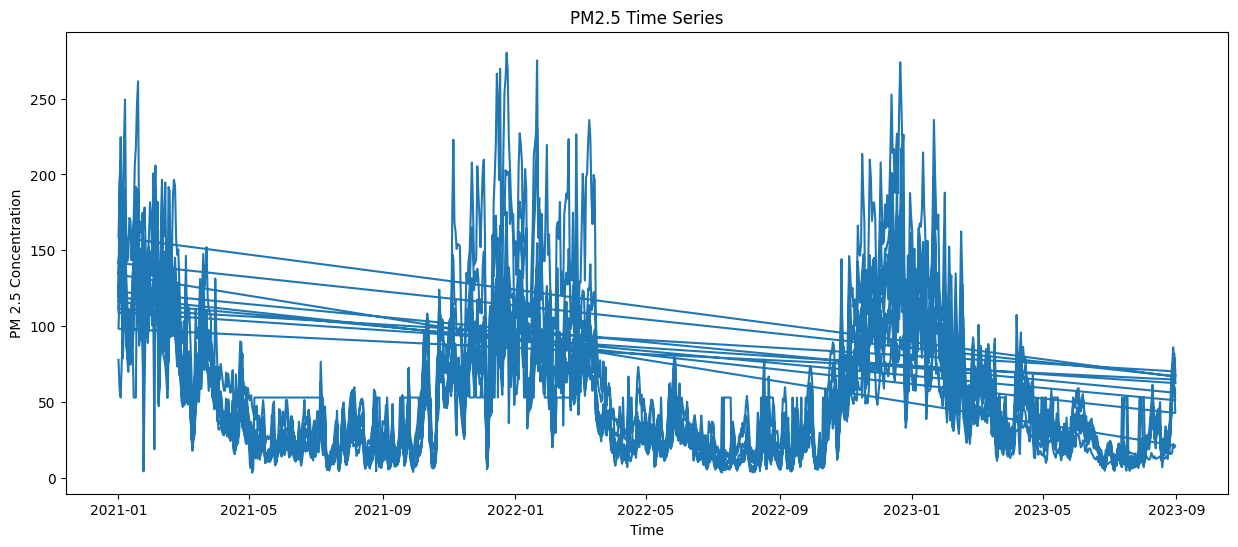

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(df['PM 2.5'])
plt.title('PM2.5 Time Series')
plt.xlabel('Time')
plt.ylabel('PM 2.5 Concentration')
plt.show()


In [39]:
result = adfuller(df['PM 2.5'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -9.206729180207649
p-value: 1.9359089316199753e-15


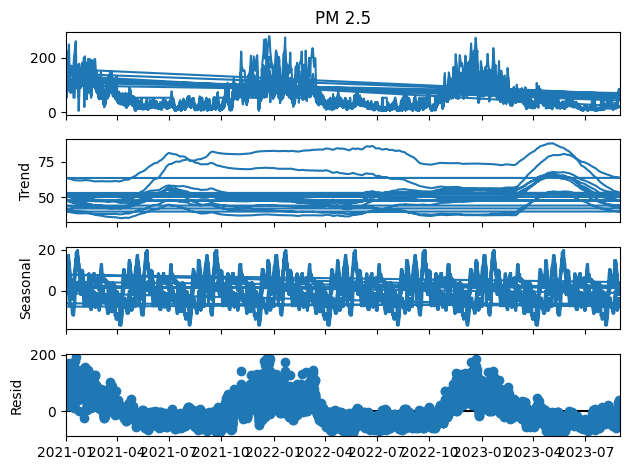

In [40]:
decomposition = seasonal_decompose(df['PM 2.5'], model='additive', period=365)
decomposition.plot()
plt.show()


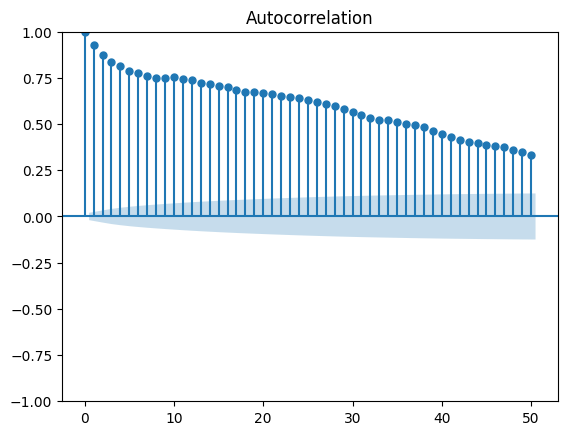

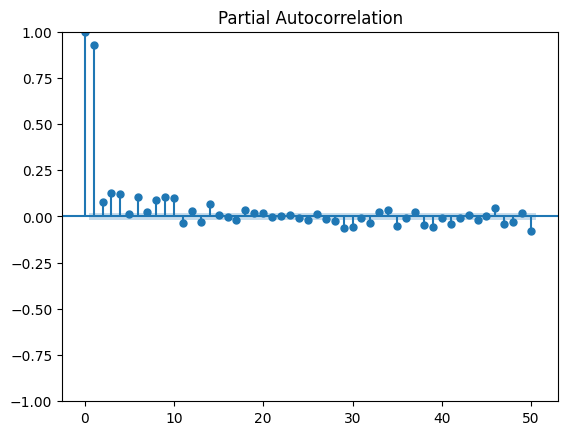

In [41]:
plot_acf(df['PM 2.5'], lags=50)
plt.show()

plot_pacf(df['PM 2.5'], lags=50)
plt.show()


In [42]:
model = SARIMAX(df['PM 2.5'], seasonal_order=(1, 1, 1, 12))
results = model.fit()


C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kazih\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

In [32]:
predictions = results.get_forecast(steps=...)
confidence_intervals = predictions.conf_int()


TypeError: unsupported operand type(s) for +: 'ellipsis' and 'int'

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['PM 2.5'], label='Observed')
plt.plot(predictions.predicted_mean, label='Predicted', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('PM2.5 Time Series Forecast')
plt.xlabel('Time')
plt.ylabel('PM 2.5 Concentration')
plt.legend()
plt.show()
